# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
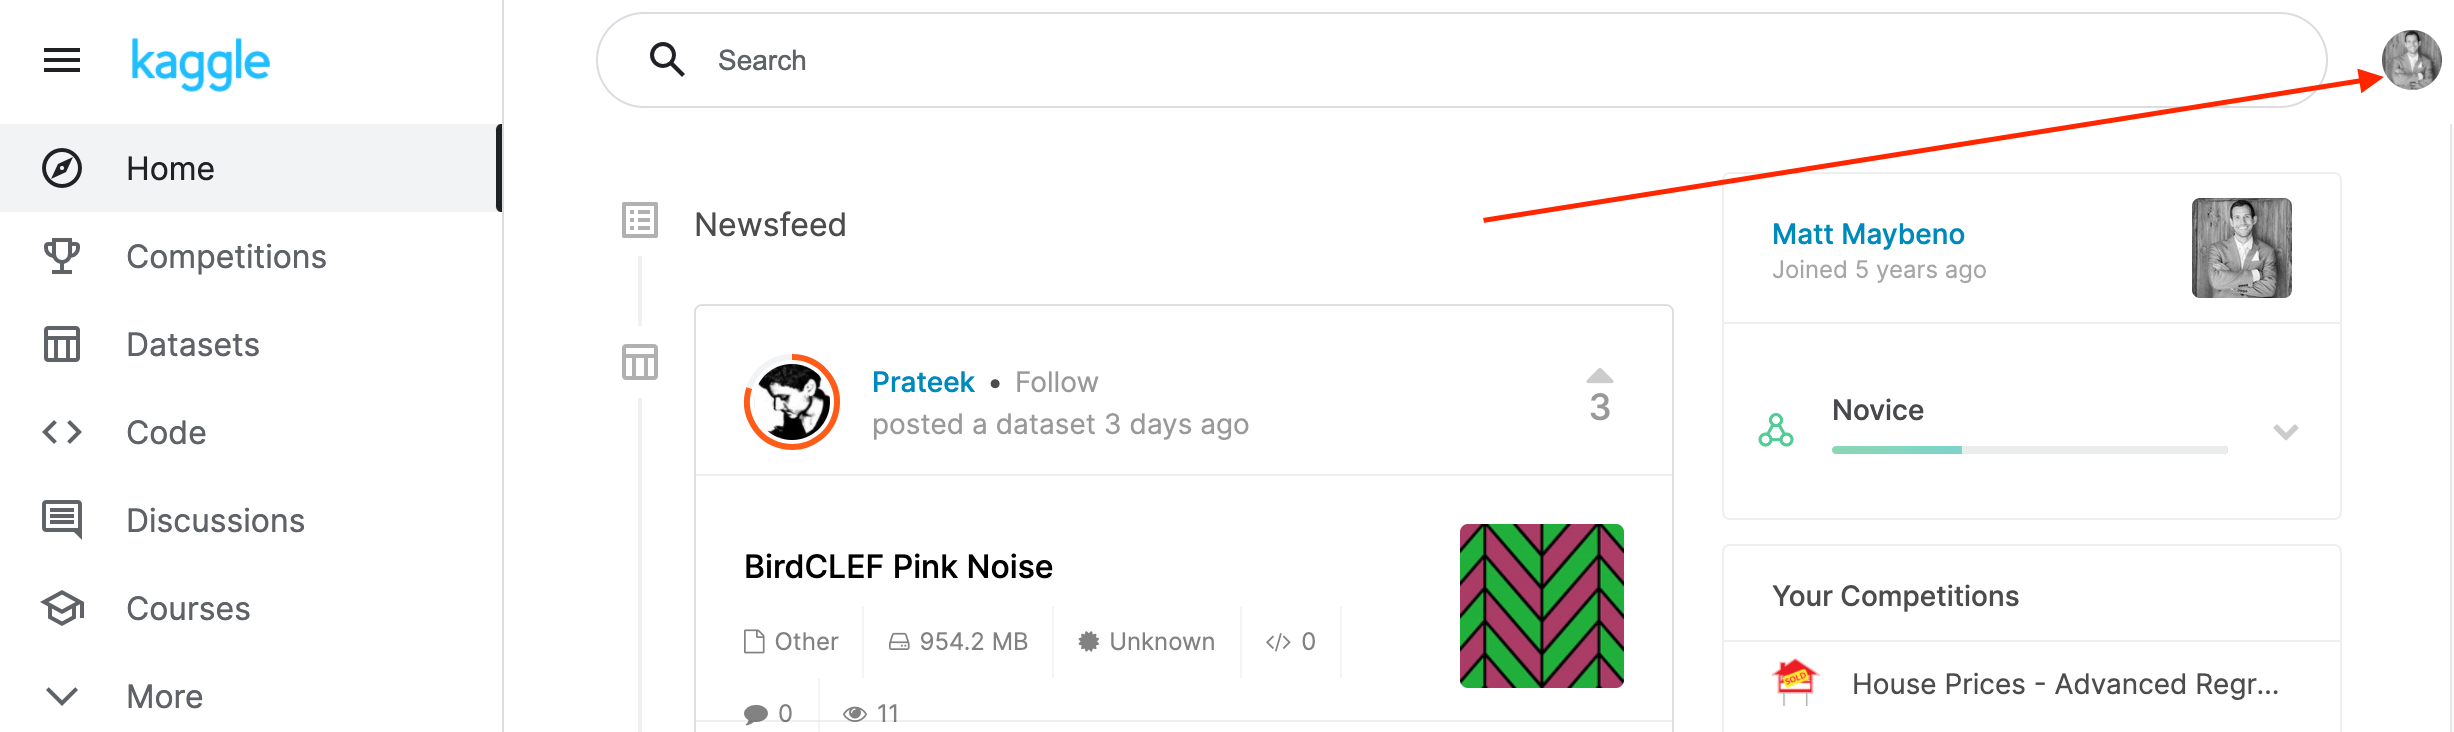
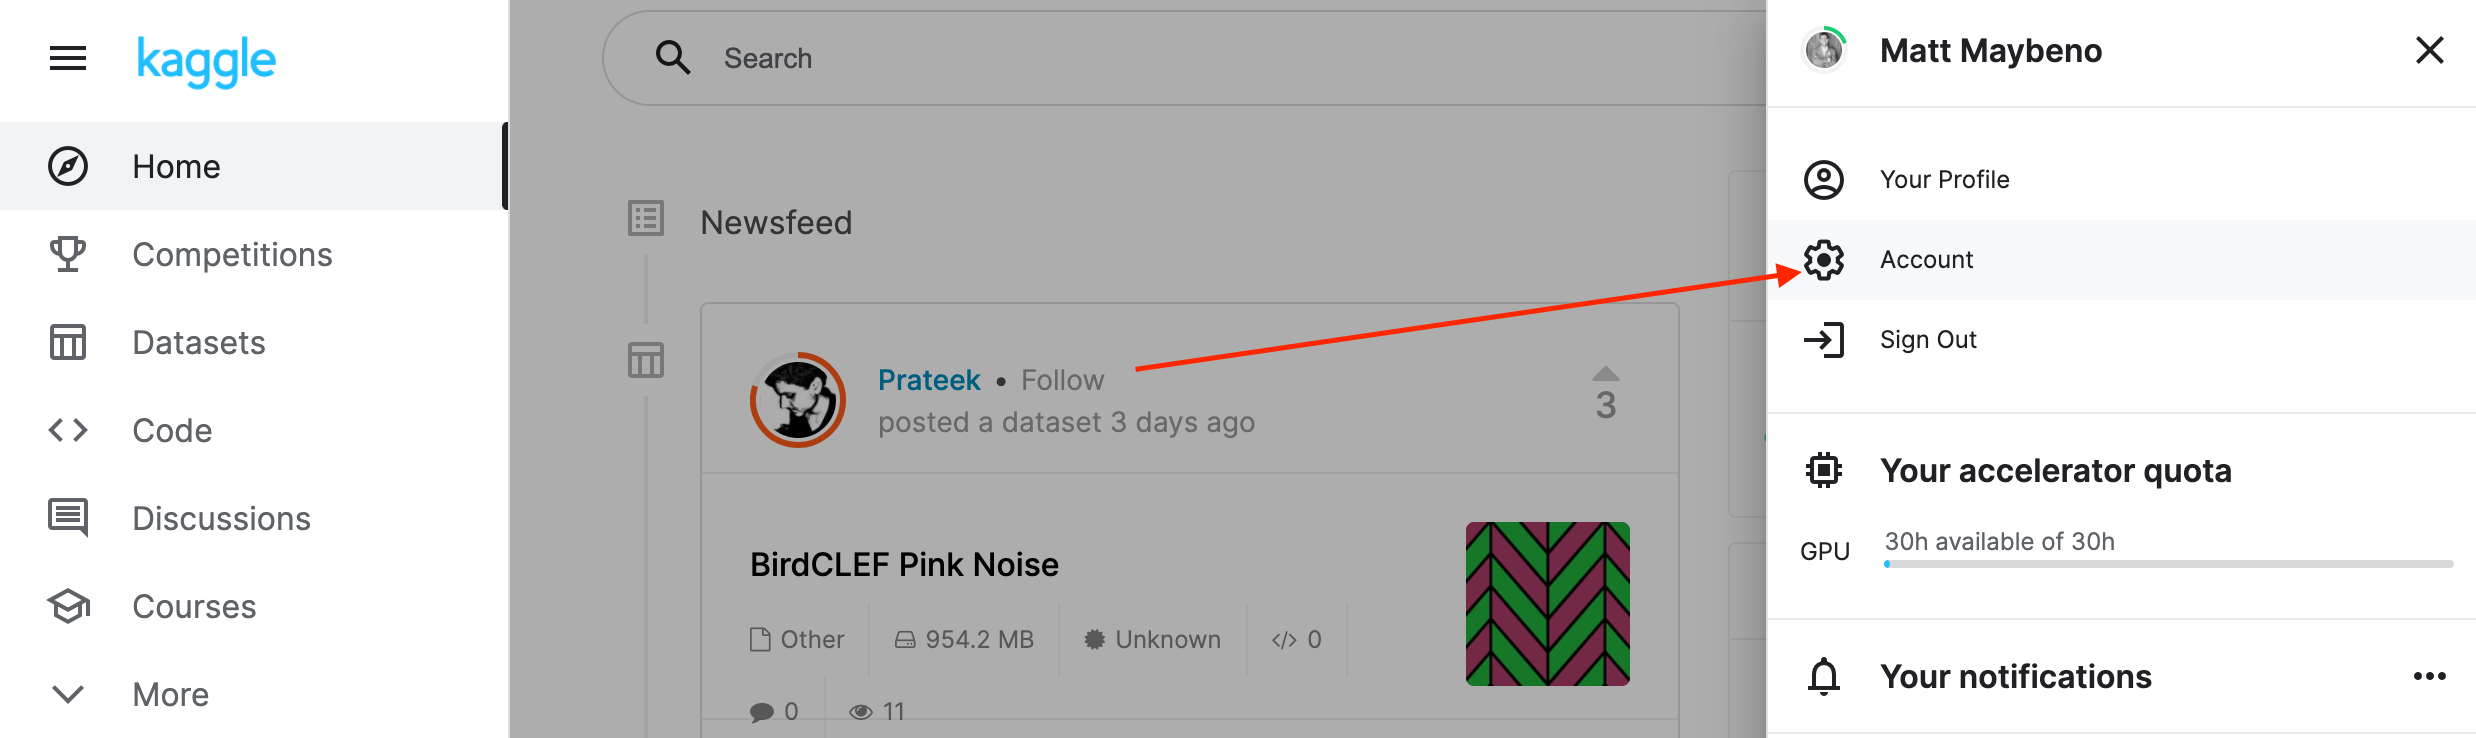
2. Scroll down to API and click Create New API Token.
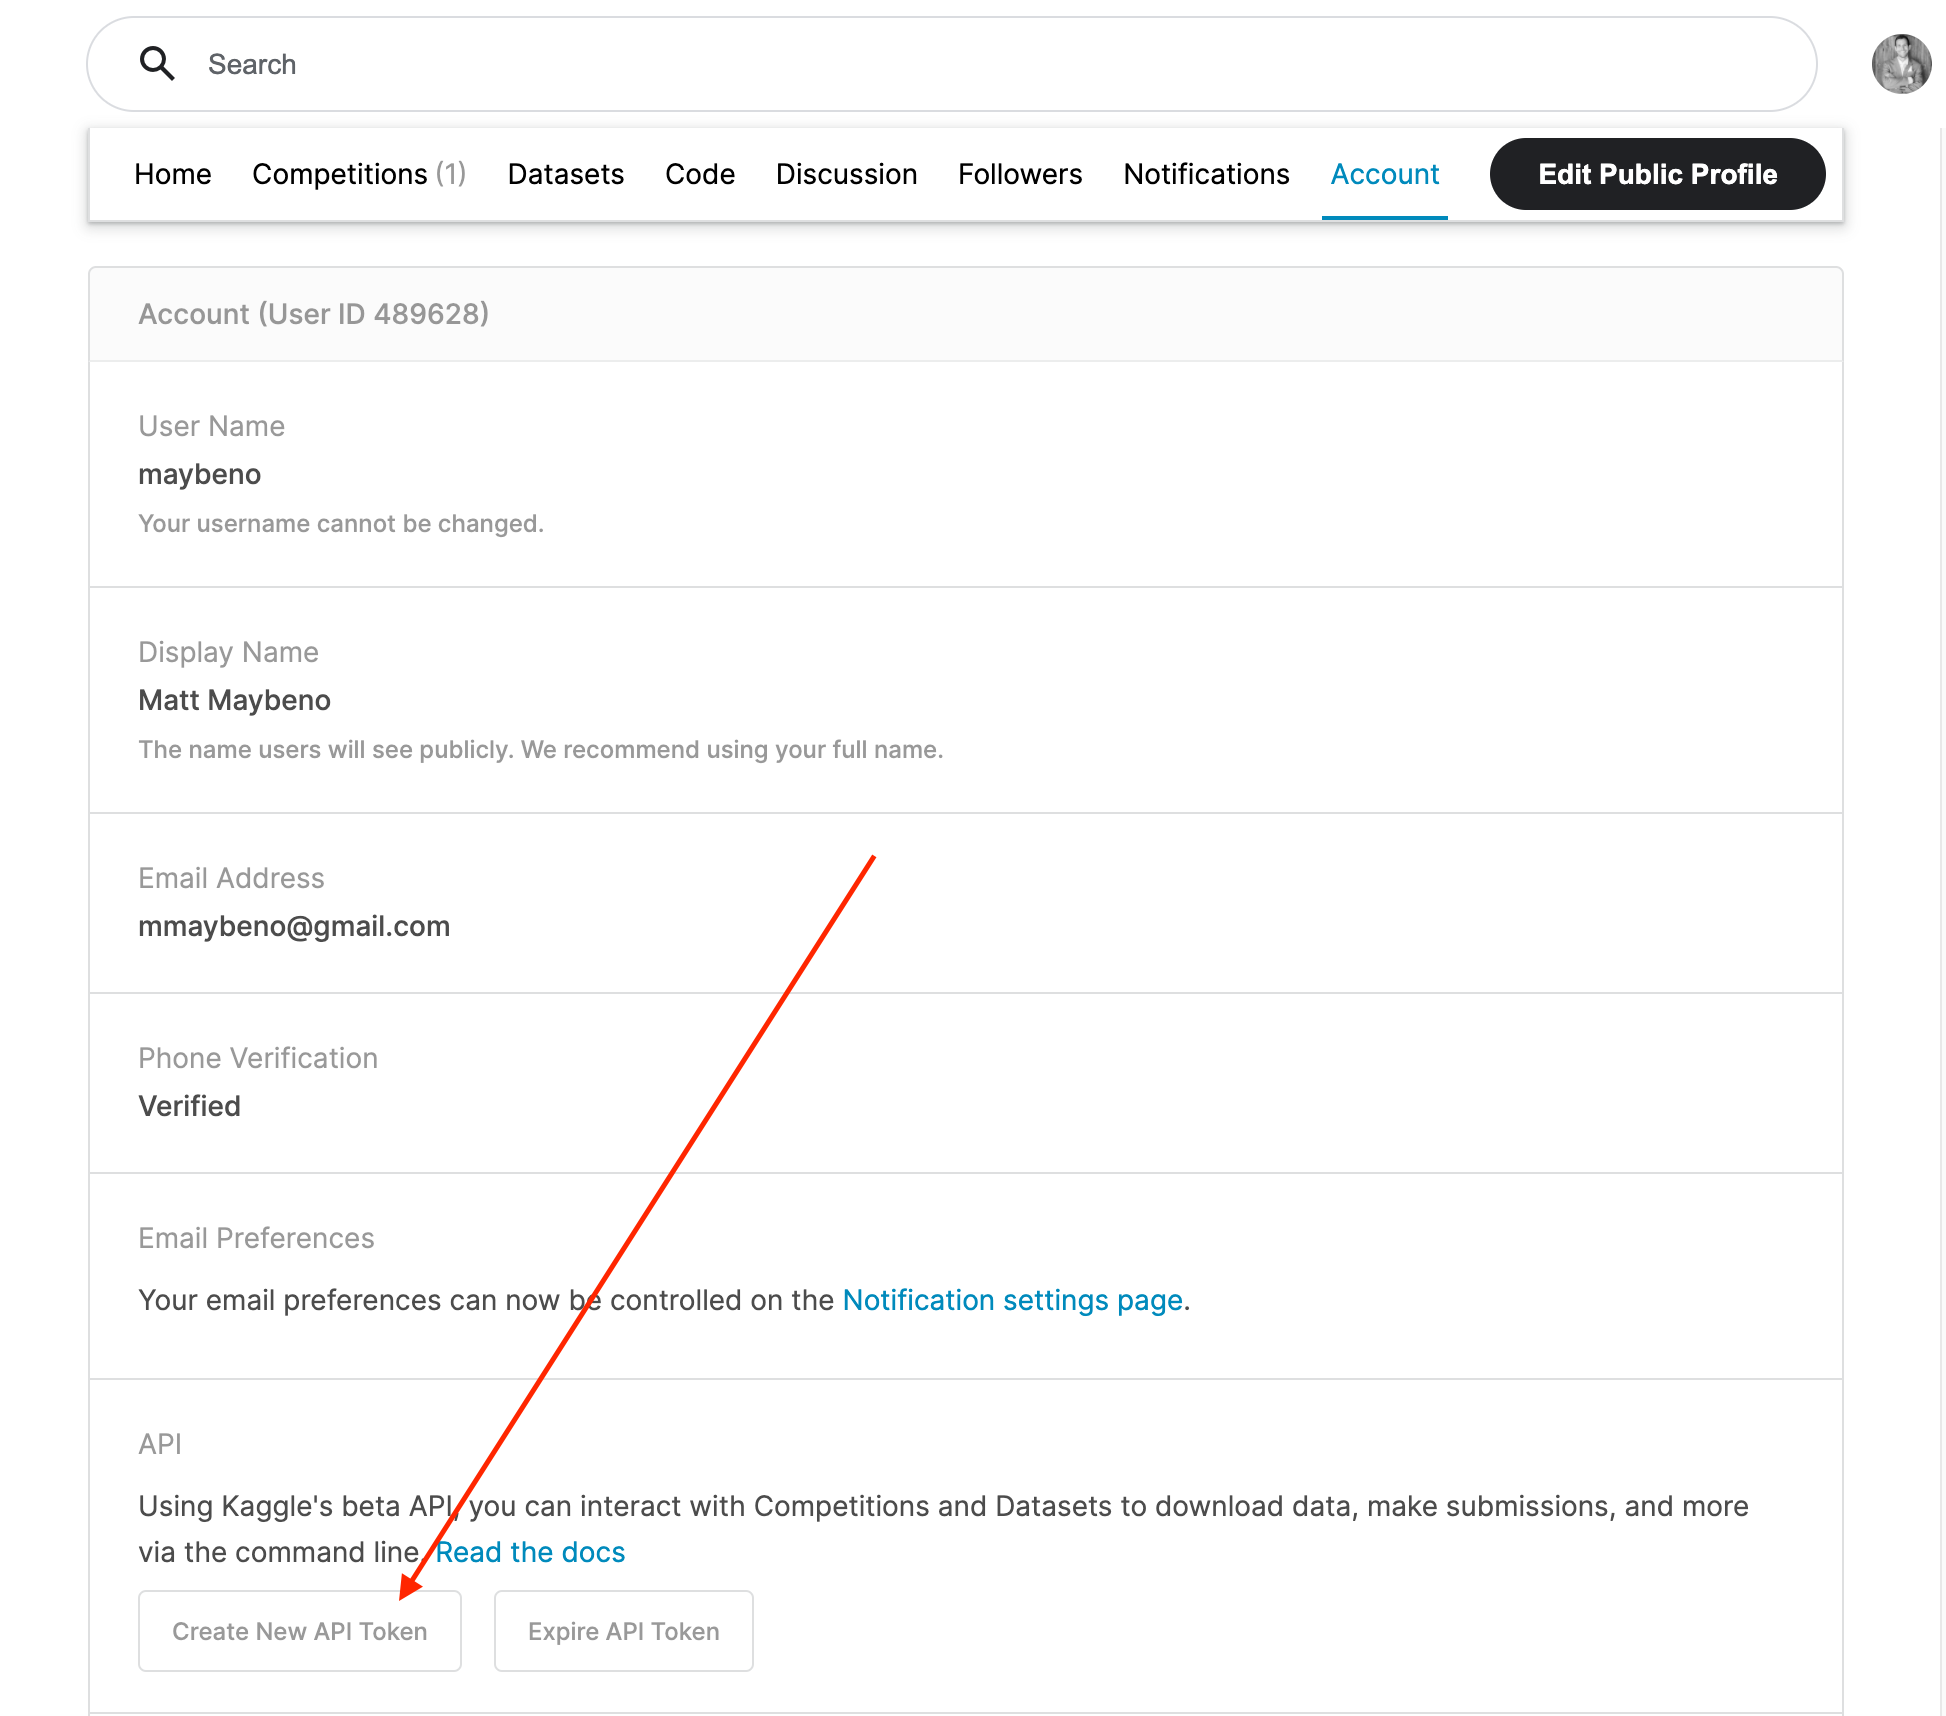
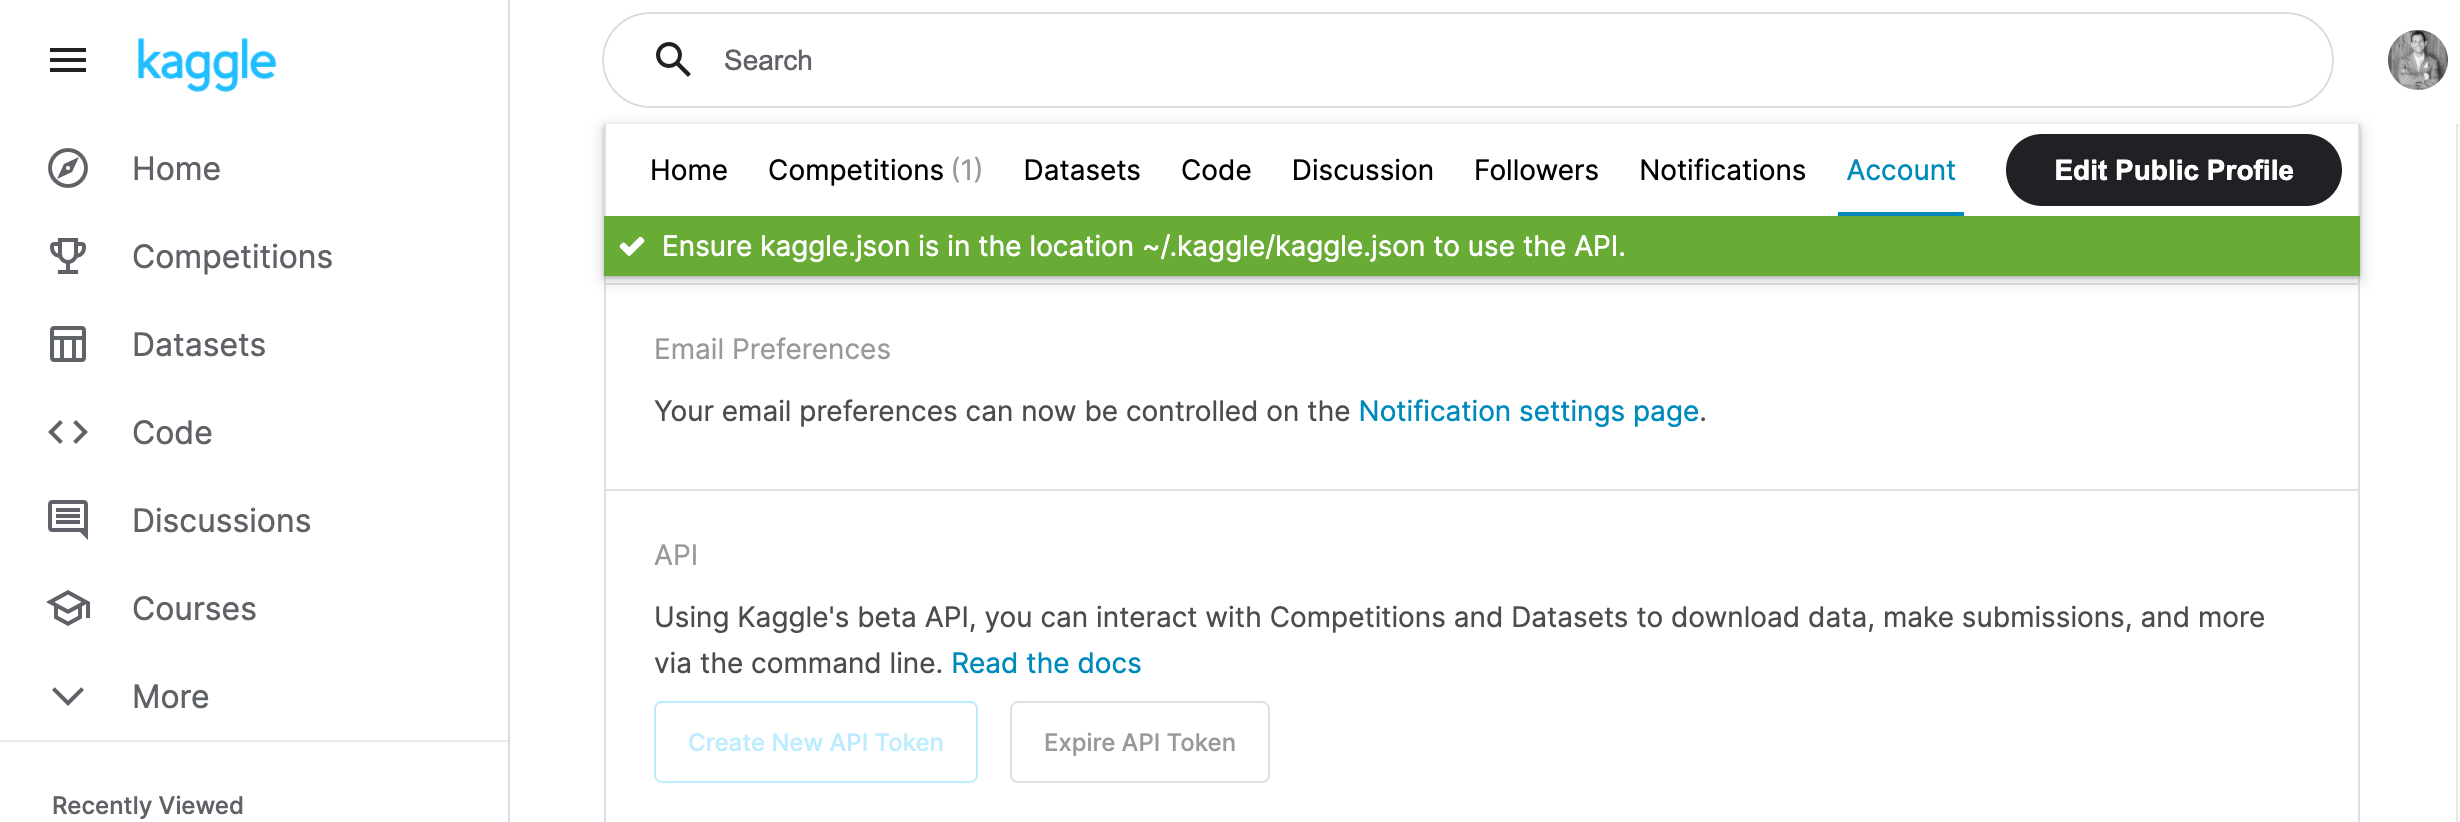
3. Open up `kaggle.json` and use the username and key.
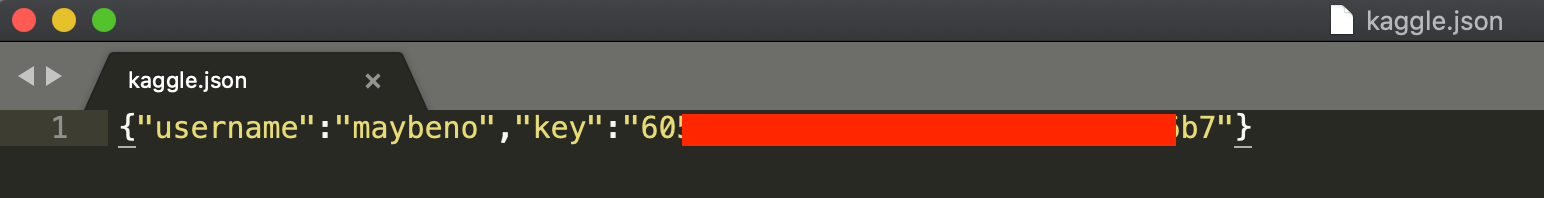

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!conda create -y -n ag-gluon37 python=3.7


Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/sagemaker-user/.conda/envs/ag-gluon37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    liblzma-devel-5.8.1        |       hb9d3cd8_1         431 KB  conda-forge
    libstdcxx-15.1.0           |       h8f9b012_2         3.7 MB  conda-forge
    libstdcxx-ng-15.1.0        |       h4852527_2          34 KB  conda-forge
    pip-24.0                   |     pyhd8ed1ab_0         1.3 MB  conda-forge
    python-3.7.12              |hf930737_100_cpython        57.3 MB  conda-forge
    setuptools-69.0.3          |     pyhd8ed1ab_0         460 KB  con

In [2]:
# !bash -c "source /opt/conda/etc/profile.d/conda.sh && \
# conda activate ag-gluon10 && \
# pip install --upgrade pip setuptools==65.5.0 wheel==0.38.4 && \
# pip install pandas==1.5.3 matplotlib && \
# pip install mxnet==1.9.1 ConfigSpace==0.4.18 && \
# pip install bokeh==3.0.0 && \
# pip install autogluon.tabular==0.7.0 --no-cache-dir && \
# pip install ipykernel && \
# python -m ipykernel install --user --name ag-gluon10 --display-name 'Python AFP (AutoGluon 3.10)'"
!bash -c "source /opt/conda/etc/profile.d/conda.sh && \
conda activate ag-gluon37 && \
pip install --upgrade pip setuptools==59.5.0 wheel==0.36.2 && \
pip install pandas==1.3.5 matplotlib==3.5.2 && \
pip install mxnet==1.8.0.post0 ConfigSpace==0.4.18 && \
pip install bokeh==2.4.3 && \
pip install autogluon.tabular==0.4.0 --no-cache-dir && \
pip install ipykernel && \
python -m ipykernel install --user --name ag-gluon37 --display-name 'Python AFP (AutoGluon 3.7)'"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 50.1 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.42.0
    Uninstalling wheel-0.42.0:
      Successfully uninstalled wheel-0.42.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.0.3
    Uninstalling setuptools-69.0.3:
      Successfully uninstalled setuptools-69.0.3
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 12.5 MB/s eta 0:00:00
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 90.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 97.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [9]:

# !pip show setuptools # ==65.5.0 
# !pip show wheel #==0.38.4
# !pip show pandas #==1.5.3 
# !pip show matplotlib
# !pip show mxnet #==1.9.1 
# !pip show ConfigSpace # ==0.4.18 
# !pip show bokeh #==3.0.0
# !pip show autogluon.tabular  # ==0.7.0 
# !pip show ipykernel


Name: ipykernel
Version: 6.29.5
Summary: IPython Kernel for Jupyter
Home-page: https://ipython.org
Author: 
Author-email: IPython Development Team <ipython-dev@scipy.org>
License: BSD 3-Clause License

Copyright (c) 2015, IPython Development Team

All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT 

In [15]:
# still the below were not installed somehow
# WARNING: Package(s) not found: mxnet
# WARNING: Package(s) not found: ConfigSpace
# WARNING: Package(s) not found: bokeh

# !pip install mxnet==1.9.1 
# !pip show mxnet

# !pip install ConfigSpace==0.4.18 
# !pip show ConfigSpace # ==0.4.18 

# !pip install bokeh==3.0.0
# !pip show bokeh #==3.0.0


Name: bokeh
Version: 3.0.0
Summary: Interactive plots and applications in the browser from Python
Home-page: https://bokeh.org
Author: Bokeh Team
Author-email: info@bokeh.org
License: Copyright (c) 2012 - 2022, Anaconda, Inc., and Bokeh Contributors
All rights reserved.        
Redistribution and use in source and binary forms, with or without modification,
are permitted provided that the following conditions are met:        
Redistributions of source code must retain the above copyright notice,
this list of conditions and the following disclaimer.        
Redistributions in binary form must reproduce the above copyright notice,
this list of conditions and the following disclaimer in the documentation
and/or other materials provided with the distribution.        
Neither the name of Anaconda nor the names of any contributors
may be used to endorse or promote products derived from this software
without specific prior written permission.        
THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT

In [9]:
# !pip install -U pip
# !pip install -U setuptools wheel
# !pip install -U "mxnet<2.0.0" bokeh==2.0.1
# !pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /home/sagemaker-user/.conda/envs/autogluon-bike-share

  added / updated specs:
    - python=3.9


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  bzip2              conda-forge/linux-64::bzip2-1.0.8-h4bc722e_7 
  ca-certificates    conda-forge/noarch::ca-certificates-2025.4.26-hbd8a1cb_0 
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.43-h712a8e2_4 
  libexpat           conda-forge/linux-64::libexpat-2.7.0-h5888daf_0 
  libffi             conda-forge/linux-64::libffi-3.4.6-h2dba641_1 
  libgcc             conda-forge/linux-64::lib

### Setup Kaggle API Key

In [8]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root’: Permission denied
touch: cannot touch '/root/.kaggle/kaggle.json': Permission denied
chmod: cannot access '/root/.kaggle/kaggle.json': Permission denied


In [9]:
!mkdir -p /home/sagemaker-user/.kaggle
!touch /home/sagemaker-user/.kaggle/kaggle.json
!chmod 600 /home/sagemaker-user/.kaggle/kaggle.json

In [10]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "angelfloresp"
kaggle_key = "636b009587033deeff354fdff22cffec"

# Save API token the kaggle.json file
with open("/home/sagemaker-user/.kaggle/kaggle.json", "w") as f:
    print(f"username :{kaggle_username}")
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

username :angelfloresp


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
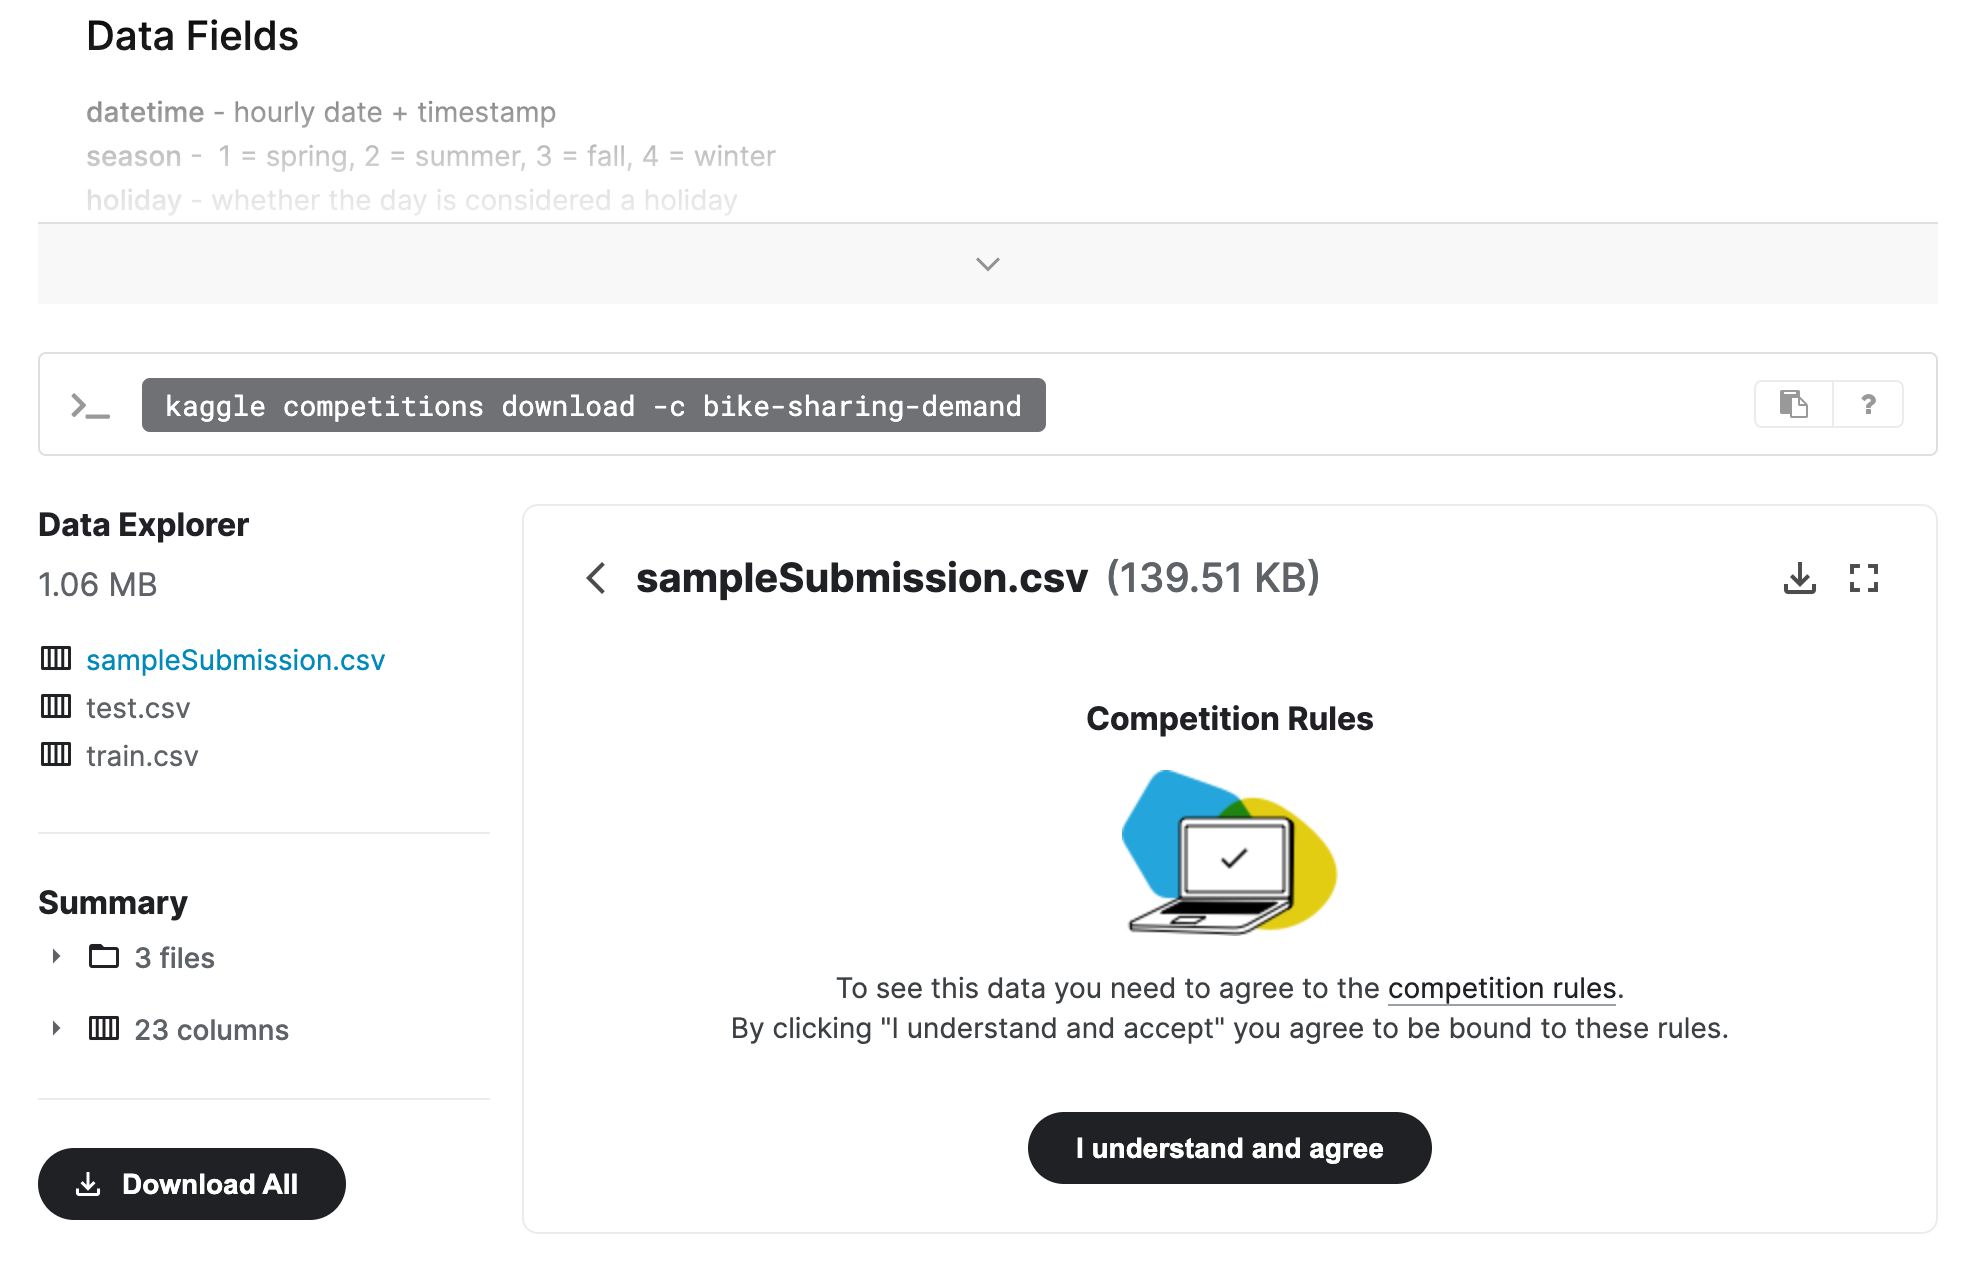

In [50]:
!pip install kaggle
!pip show kaggle

  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
Name: kaggle
Version: 1.7.4.5
Summary: Access Kaggle resources anywhere
Home-page: https://github.com/Kaggle/kaggle-api
Author: 
Author-email: Kaggle <support@kaggle.com>
License: Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definitio

In [13]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 530MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [18]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [19]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later

# Load the train dataset
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

# train.dtypes, train.shape

# train = ?
# train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [20]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()


season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [21]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [22]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

# Drop 'casual' and 'registered' columns since they're not in the test set
train_cleaned = train.drop(columns=['casual', 'registered'])

# separate train on train_data and val_data for evaluation
train_data, val_data = train_test_split(train_cleaned, test_size=0.2, random_state=42)

# Define label and fit model
predictor = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train_data,
    time_limit=600,
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250519_233806/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20250519_233806/"
AutoGluon Version:  0.4.0
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    8708
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (970, 1, 191.58475, 181.01072)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1900.5 MB
	Train Data (Original)  Memory Usage: 0.63 

<AxesSubplot:xlabel='model'>

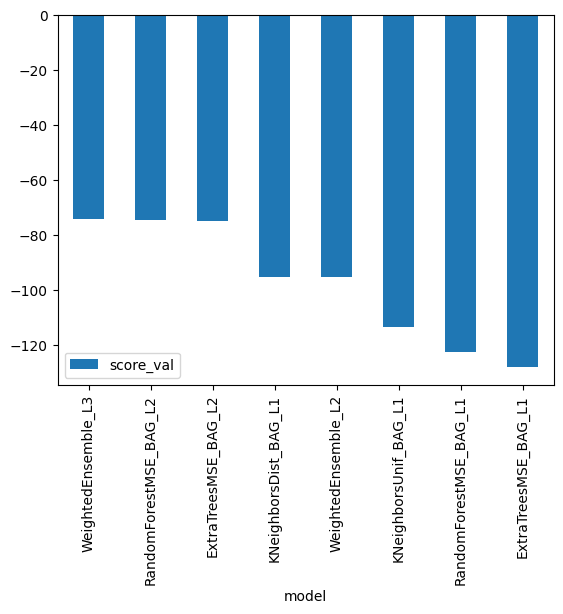

In [33]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [42]:
# Obtain the RMSE for the default 
score_default = predictor.evaluate(val_data)
rmse = score_default['root_mean_squared_error']
rmse = -rmse if rmse < 0 else rmse
print(f" Validation RMSE: {rmse}")


Evaluation: root_mean_squared_error on test data: -75.38350170677845
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -75.38350170677845,
    "mean_squared_error": -5682.672329575868,
    "mean_absolute_error": -45.228237497467205,
    "r2": 0.8278339936547886,
    "pearsonr": 0.9099564131080138,
    "median_absolute_error": -24.868446350097656
}


 Validation RMSE: 75.38350170677845


### Review AutoGluon's training run with ranking of models that did the best.

In [43]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -74.123266       2.025343  30.021623                0.000654           0.150524            3       True          8
1  RandomForestMSE_BAG_L2  -74.739851       1.584268  25.165958                0.447578          14.126065            2       True          6
2    ExtraTreesMSE_BAG_L2  -75.035328       1.577111  15.745034                0.440421           4.705141            2       True          7
3   KNeighborsDist_BAG_L1  -95.387166       0.103240   0.014998                0.103240           0.014998            1       True          2
4     WeightedEnsemble_L2  -95.387166       0.103849   0.258269                0.000609           0.243271            2       True          5
5   KNeighborsUnif_BAG_L1 -113.596269       0.107377   0.016854                0.10737

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.59626943439002,
  'KNeighborsDist_BAG_L1': -95.3871655282151,
  'RandomForestMSE_BAG_L1': -122.58256754440966,
  'ExtraTreesMSE_BAG_L1': -128.13337629580087,
  'WeightedEnsemble_L2': -95.3871655282151,
  'RandomForestMSE_BAG_L2': -74.73985093078005,
  'ExtraTreesMSE_BAG_L2': -75.035327646193,
  'WeightedEnsemble_L3': -74.12326574668741},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20250519_233806/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsDist

### Create predictions from test dataset

In [44]:
# predictions = ?
# predictions.head()
predictions = predictor.predict(test)
predictions.head()

0    27.376013
1    35.937775
2    37.883469
3    47.317387
4    52.260262
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [45]:
# Describe the `predictions` series to see if there are any negative values
# Describe predictions
# prediction_summary = predictions.describe()
# print(prediction_summary)
print(predictions.describe())

predictions.head()


count    6493.000000
mean      127.833900
std       120.447014
min         3.996209
25%        25.280525
50%        80.796860
75%       207.303207
max       560.389526
Name: count, dtype: float64


0    27.376013
1    35.937775
2    37.883469
3    47.317387
4    52.260262
Name: count, dtype: float32

In [46]:
# How many negative values do we have?
# # # Count how many predictions are negative
negative_count = (predictions < 0).sum()
print(f' negative counts:  {negative_count}')

 negative counts:  0


In [47]:
# Set them to zero
# # Set negative predictions to 0
predictions[predictions < 0] = 0
print("test predictions summary")
print(predictions)

test predictions summary
0        27.376013
1        35.937775
2        37.883469
3        47.317387
4        52.260262
           ...    
6488    279.207581
6489    279.207581
6490    281.928314
6491    281.913727
6492    275.799927
Name: count, Length: 6493, dtype: float32


### Set predictions to submission dataframe, save, and submit

In [48]:
# submission["count"] = ?
# submission.to_csv("submission.csv", index=False)

submission["count"] = predictions
submission.to_csv("submission-python-3-7.csv", index=False)
submission_created = submission.head()


In [51]:
!kaggle competitions submit -c bike-sharing-demand -f submission-python-3-7.csv -m "Python 3.7 - first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 701kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [52]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission-python-3-7.csv    2025-05-20 00:26:55.400000  Python 3.7 - first raw submission  SubmissionStatus.COMPLETE  1.80507      1.80507       
submission_new_features.csv  2025-05-19 18:05:25.253000  new features                       SubmissionStatus.COMPLETE  0.65028      0.65028       
submission.csv               2025-05-19 16:51:09.403000  first raw submission               SubmissionStatus.COMPLETE  1.84007      1.84007       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

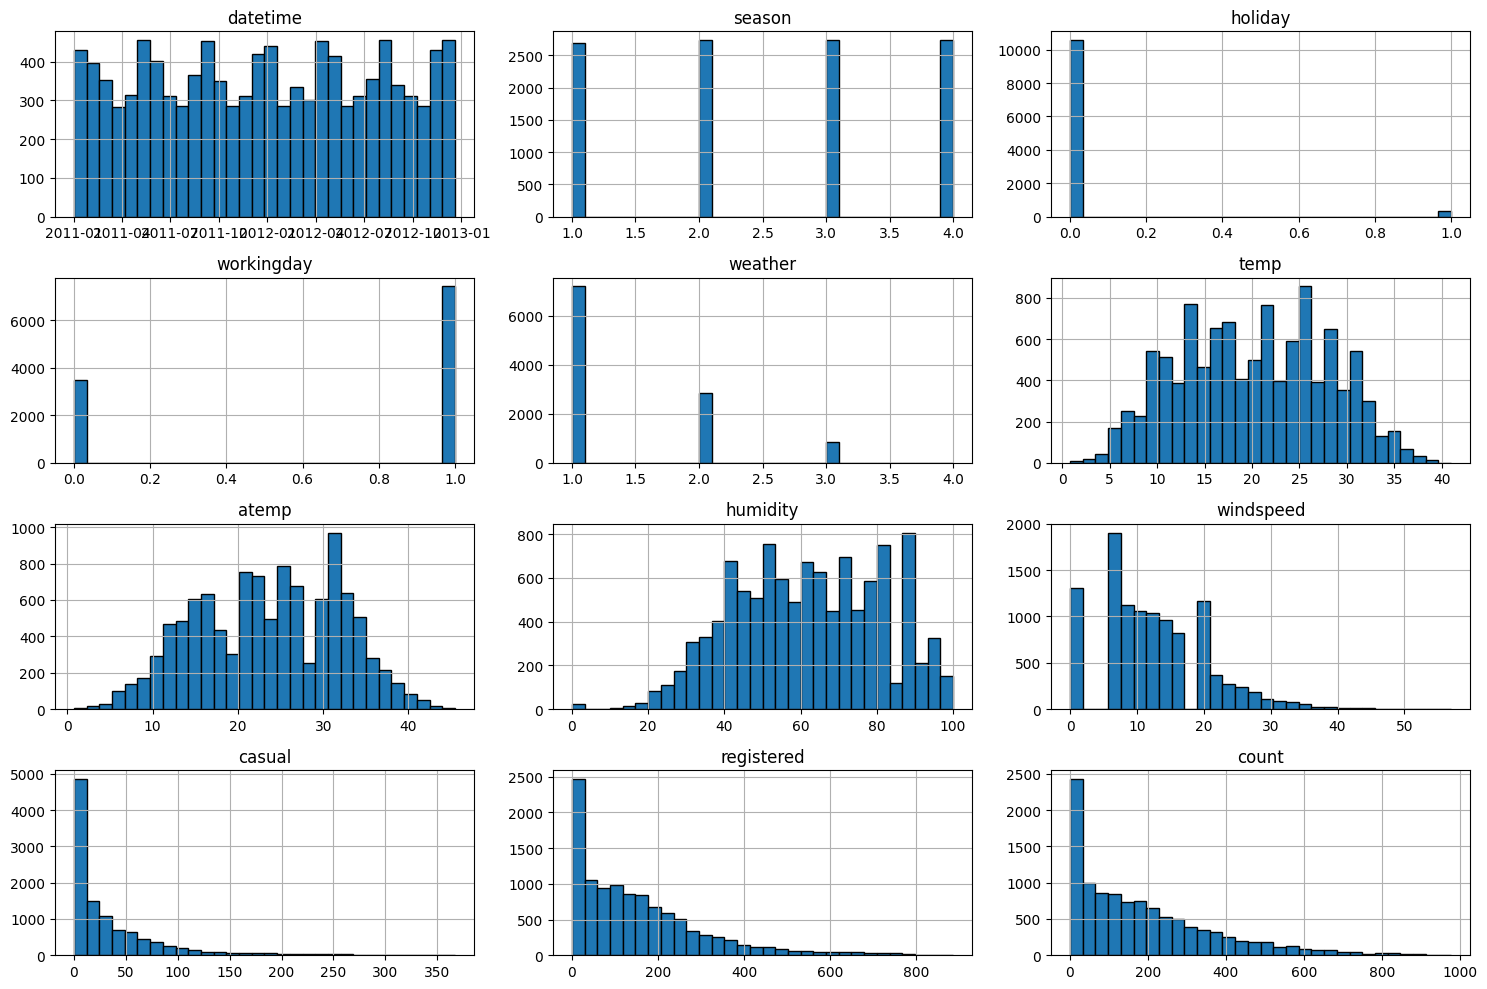

In [53]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
# train.?

import matplotlib.pyplot as plt
# Create histogram plots for all numeric features in the train dataset
histograms = train.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


In [54]:
# create a new feature
# train[?] = ?
# test[?] = ?

# Create new feature 'hour' from the 'datetime' column
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

train['day'] = train['datetime'].dt.day
test['day'] = test['datetime'].dt.day

train['month'] = train['datetime'].dt.month
test['month'] = test['datetime'].dt.month

train.head()


datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  day  month  
0        81        0.0       3          13     16     0    1      1  
1        80        0.0       8          32     40     1    1      1  
2        80        0.0       5          27     32     2    1      1  
3        75        0.0       3          10     13     3    1      1  
4        75        0.0       0           1      1     4    1      1

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [56]:
# train["season"] = ?
# train["weather"] = ?
# test["season"] = ?
# test["weather"] = ?

train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")


In [57]:
train.describe()

holiday    workingday         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.028569      0.680875     20.23086     23.655084     61.886460   
std        0.166599      0.466159      7.79159      8.474601     19.245033   
min        0.000000      0.000000      0.82000      0.760000      0.000000   
25%        0.000000      0.000000     13.94000     16.665000     47.000000   
50%        0.000000      1.000000     20.50000     24.240000     62.000000   
75%        0.000000      1.000000     26.24000     31.060000     77.000000   
max        1.000000      1.000000     41.00000     45.455000    100.000000   

          windspeed        casual    registered         count          hour  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      12.799395     36.021955    155.552177    191.574132     11.541613   
std        8.164537     49.960477    151.039033    181.144454      6.915838   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%        7.001500      4.000000     36.000000     42.000000      6.000000   
50%       12.998000     17.000000    118.000000    145.000000     12.000000   
75%       16.997900     49.000000    222.000000    284.000000     18.000000   
max       56.996900    367.000000    886.000000    977.000000     23.000000   

                day         month  
count  10886.000000  10886.000000  
mean       9.992559      6.521495  
std        5.476608      3.444373  
min        1.000000      1.000000  
25%        5.000000      4.000000  
50%       10.000000      7.000000  
75%       15.000000     10.000000  
max       19.000000     12.000000

In [58]:
print(train.dtypes)

datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
hour                   int64
day                    int64
month                  int64
dtype: object


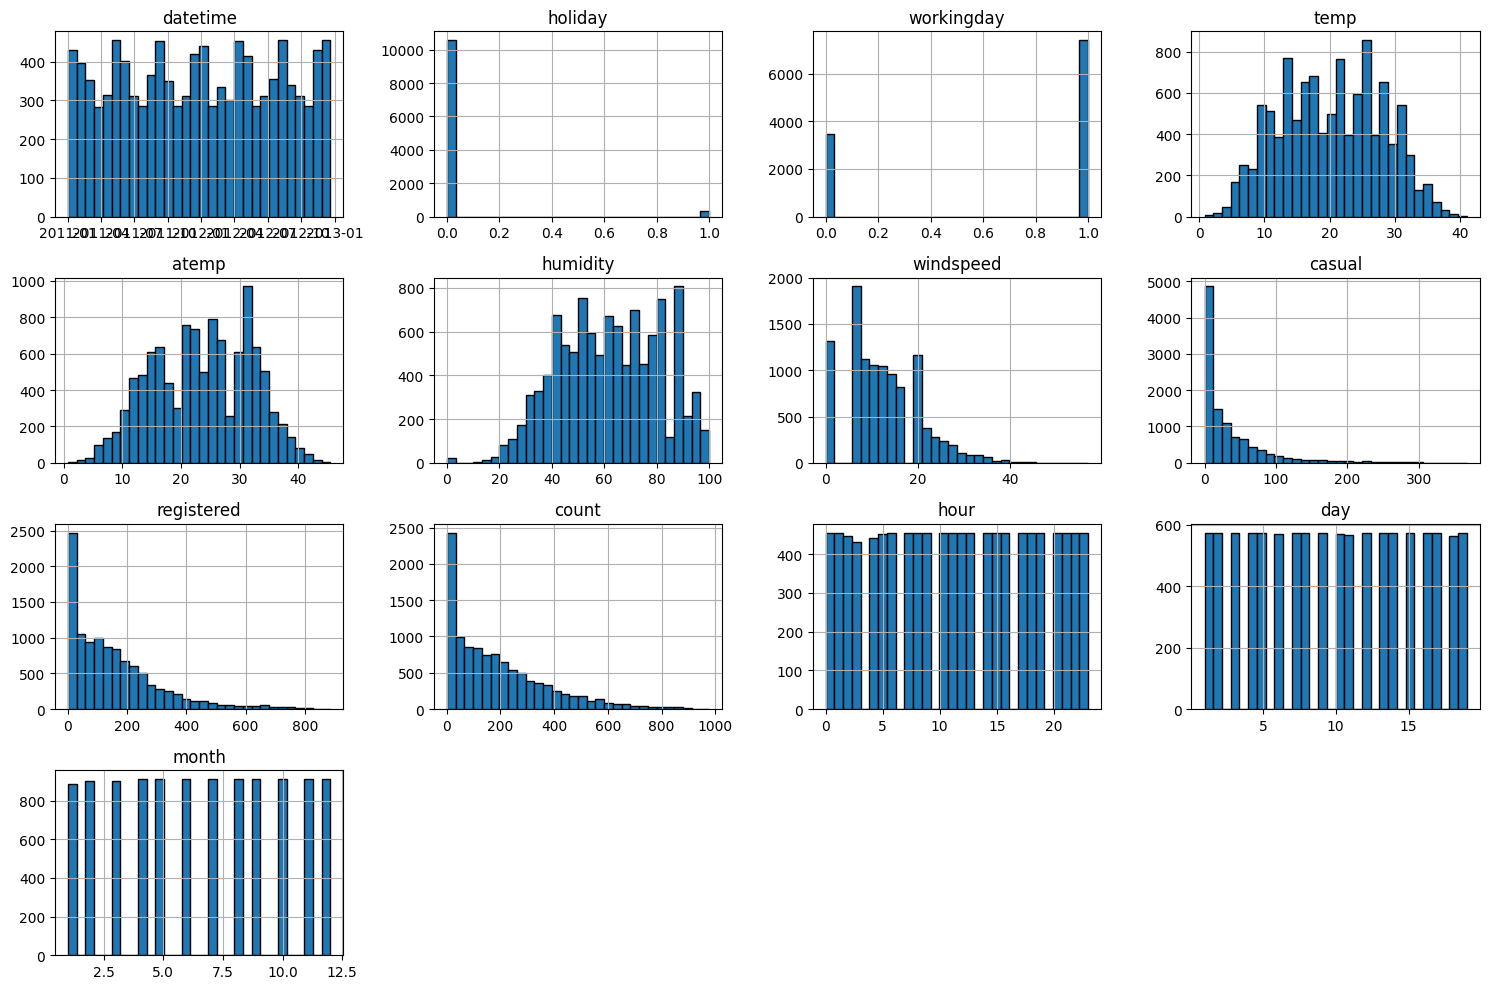

In [59]:
# View histogram of all features again now with the hour feature
# train.?
# Replot histograms to include the new 'hour' feature
histograms_with_hour = train.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


## Step 5: Rerun the model with the same settings as before, just with more features

In [63]:
# predictor_new_features = TabularPredictor(?).fit(?)
# Retrain with the new features (like 'hour') and cleaned train data
train_new = train.drop(columns=["casual", "registered"])  # Remove columns not available in test

# separate train on train_data and val_data for evaluation
train_data, val_data = train_test_split(train_new, test_size=0.2, random_state=42)

predictor_new_features = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error'
).fit(
    train_data=train_data,
    time_limit=600,
    presets='best_quality'
)

# Generate predictions on the test set with new features
predictions_new = predictor_new_features.predict(test)

No path specified. Models will be saved in: "AutogluonModels/ag-20250520_004139/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20250520_004139/"
AutoGluon Version:  0.4.0
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    8708
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (970, 1, 191.58475, 181.01072)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1769.71 MB
	Train Data (Original)  Memory Usage: 0.7

<AxesSubplot:xlabel='model'>

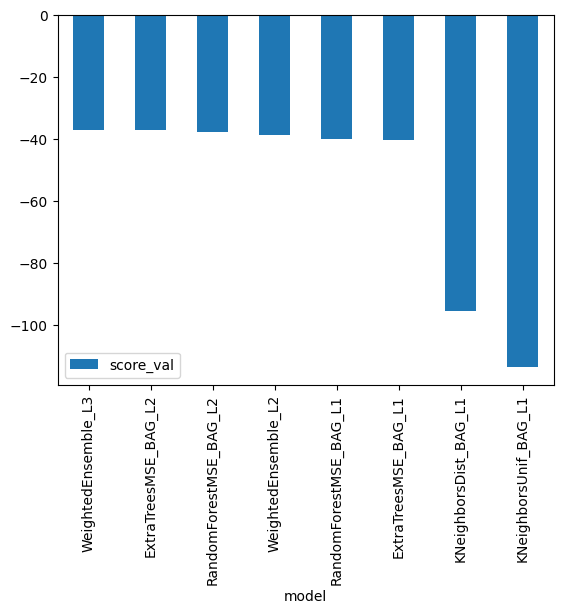

In [67]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [65]:
# Obtain the RMSE for the default 
score_new_features = predictor_new_features.evaluate(val_data)
rmse_new_features = score_new_features['root_mean_squared_error']
rmse_new_features = -rmse_new_features if rmse_new_features < 0 else rmse_new_features
print(f" Validation RMSE (new features): {rmse_new_features}")

Evaluation: root_mean_squared_error on test data: -34.92715425047865
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -34.92715425047865,
    "mean_squared_error": -1219.906104036729,
    "mean_absolute_error": -21.614394127227932,
    "r2": 0.9630409163387703,
    "pearsonr": 0.9813562830322264,
    "median_absolute_error": -12.881919860839844
}


 Validation RMSE (new features): 34.92715425047865


In [68]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -36.955763       1.982340  36.242745                0.000670           0.147605            3       True          8
1    ExtraTreesMSE_BAG_L2  -36.976263       1.525833  19.569062                0.444674           5.712861            2       True          7
2  RandomForestMSE_BAG_L2  -37.630632       1.536996  30.382279                0.455837          16.526078            2       True          6
3     WeightedEnsemble_L2  -38.800226       0.977041  14.077620                0.000654           0.237832            2       True          5
4  RandomForestMSE_BAG_L1  -39.964884       0.439374   9.712074                0.439374           9.712074            1       True          3
5    ExtraTreesMSE_BAG_L1  -40.396142       0.433736   4.110719                0.43373

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.59626943439002,
  'KNeighborsDist_BAG_L1': -95.3871655282151,
  'RandomForestMSE_BAG_L1': -39.9648837244962,
  'ExtraTreesMSE_BAG_L1': -40.39614154867642,
  'WeightedEnsemble_L2': -38.80022555659732,
  'RandomForestMSE_BAG_L2': -37.63063150702416,
  'ExtraTreesMSE_BAG_L2': -36.97626309216049,
  'WeightedEnsemble_L3': -36.95576305873303},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20250520_004139/models/KNeighborsUnif_BAG_L1/',
  'KNeighborsDist

In [70]:
# How many negative values do we have?
# # # Count how many predictions are negative
negative_count_new = (predictions_new < 0).sum()
print(f' negative counts:  {negative_count_new}')

# Remember to set all negative values to zero
# ?
predictions_new[predictions_new < 0] = 0
# Ensure no negative predictions


 negative counts:  0


In [71]:
# Same submitting predictions
# submission_new_features["count"] = ?

# Same thing as train and test dataset - creating new variable: "submission_new"
submission_new = pd.read_csv('sampleSubmission.csv')
submission_new.head()
submission_new["count"] = predictions_new
submission_new.to_csv("submission_python-3-7-new_features.csv", index=False)

In [72]:
!kaggle competitions submit -c bike-sharing-demand -f submission_python-3-7-new_features.csv -m "Python 3.7 - New features submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 773kB/s]
Successfully submitted to Bike Sharing Demand

In [73]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                                date                        description                           status                     publicScore  privateScore  
--------------------------------------  --------------------------  ------------------------------------  -------------------------  -----------  ------------  
submission_python-3-7-new_features.csv  2025-05-20 00:51:10.110000  Python 3.7 - New features submission  SubmissionStatus.COMPLETE  0.53494      0.53494       
submission-python-3-7.csv               2025-05-20 00:26:55.400000  Python 3.7 - first raw submission     SubmissionStatus.COMPLETE  1.80507      1.80507       
submission_new_features.csv             2025-05-19 18:05:25.253000  new features                          SubmissionStatus.COMPLETE  0.65028      0.65028       
submission.csv                          2025-05-19 16:51:09.403000  first raw submission                  SubmissionStatus.COMPLETE  1.84007      1.84007       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [74]:
# predictor_new_hpo = TabularPredictor(?).fit(?)
from autogluon.tabular import TabularPredictor

# Define hyperparameter tuning options
# hyperparameters = 'default'  # Use default models but enable tuning
hyperparameters = {
                'GBM': {
                        'learning_rate': [0.005, 0.01, 0.05, 0.1],
                        'num_leaves': [31, 50, 100, 150],
                        'feature_fraction': [0.6, 0.8, 1.0],
                        'min_data_in_leaf': [20, 50, 100]
                },
                'XGB': {},
                'RF': {},
                'CAT': {}
}
                # 'GBM': {
                #         'learning_rate': [0.01, 0.05, 0.1],
                #         'num_leaves': [31, 50, 100],
                #         'feature_fraction': [0.8, 1.0]
                # },
 #      'num_trials': 10

hyperparameter_tune_kwargs = {
    'num_trials': 50, # 25,  # Try 10 combinations of hyperparameters
    'scheduler': 'local',
    'searcher': 'bayesopt'
    # 'searcher': 'random'
}

# Prepare training data
train_hpo = train.drop(columns=["casual", "registered"])

train_data, val_data = train_test_split(train_hpo, test_size=0.2, random_state=42)

# Train with hyperparameter optimization
predictor_new_hpo = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error', path='AutogluonModels/new_hpo/'
).fit(
    train_data=train_data,
    time_limit=600,
    # presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    verbosity=2
)

Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/new_hpo/"
AutoGluon Version:  0.4.0
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    8708
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (970, 1, 191.58475, 181.01072)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1807.86 MB
	Train Data (Original)  Memory Usage: 0.71 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually 

<AxesSubplot:xlabel='model'>

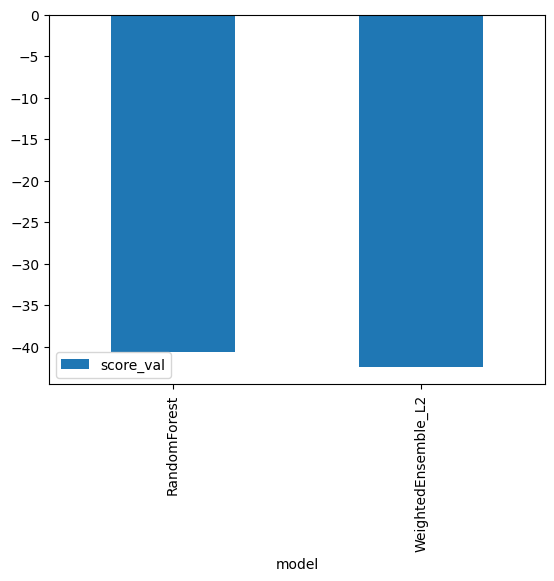

In [75]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [76]:
# Obtain the RMSE for the default 
score_hpo = predictor_new_hpo.evaluate(val_data)
rmse_hpo = score_hpo['root_mean_squared_error']
rmse_hpo = -rmse_hpo if rmse_hpo < 0 else rmse_hpo
print(f" Validation RMSE: {rmse_hpo}")

Evaluation: root_mean_squared_error on test data: -40.1272156319284
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -40.1272156319284,
    "mean_squared_error": -1610.193434371279,
    "mean_absolute_error": -24.760251125958778,
    "r2": 0.9512165127670358,
    "pearsonr": 0.9753879948252762,
    "median_absolute_error": -14.468341827392578
}


 Validation RMSE: 40.1272156319284


In [79]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         RandomForest -40.631460       0.328816  7.711495                0.328816           7.711495            1       True          1
1  WeightedEnsemble_L2 -42.454279       0.329367  7.714867                0.000551           0.003371            2       True          2
Number of models trained: 2
Types of models trained:
{'RFModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             : 2 | ['season', 'weather']
('float', [])                : 3 | ['temp', 'atemp', 'windspeed']
('int', [])                  : 4 | ['humidity', 'hour', 'day', 'month']
('int', ['bool'])            : 2 | ['holiday', 'workingday']
('int', ['datetime_as_int']) : 5 | ['datetime', 'datetime.y

{'model_types': {'RandomForest': 'RFModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForest': -40.631460056832424,
  'WeightedEnsemble_L2': -42.45427935287243},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'RandomForest': 'AutogluonModels/new_hpo/models/RandomForest/',
  'WeightedEnsemble_L2': 'AutogluonModels/new_hpo/models/WeightedEnsemble_L2/'},
 'model_fit_times': {'RandomForest': 7.7114951610565186,
  'WeightedEnsemble_L2': 0.0033714771270751953},
 'model_pred_times': {'RandomForest': 0.32881641387939453,
  'WeightedEnsemble_L2': 0.0005505084991455078},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'RandomForest': {'n_estimators': 300,
   'n_jobs': -1,
   'random_state': 0,
   'bootstrap': True},
  'WeightedEnsemble_L2': {'use_orig_features': False,
   'max_base_models': 25,
   'max_base_models_per_type': 5,
   'save_bag_folds': True}},
 'leaderboard':                  model  score_val  pred_time_val  fit_time 

In [80]:
# Remember to set all negative values to zero
# ?

# Generate predictions and ensure no negatives
predictions_hpo = predictor_new_hpo.predict(test)

negative_count_hpo = (predictions_hpo < 0).sum()
print(f' negative counts:  {negative_count_hpo}')

# Remember to set all negative values to zero
# ?
predictions_hpo[predictions_hpo < 0] = 0
# Ensure no negative predictions


 negative counts:  0


In [81]:
# Same submitting predictions
# submission_new_hpo["count"] = ?

# Same thing as train and test dataset - creating new variable: "submission_hpo"
submission_hpo = pd.read_csv('sampleSubmission.csv')
submission_hpo.head()
submission_hpo["count"] = predictions_hpo
submission_hpo.to_csv("submission_python-3-7-hpo.csv", index=False)

In [82]:
!kaggle competitions submit -c bike-sharing-demand -f submission_python-3-7-hpo.csv -m "Python 3.7 - HPO submission"

100%|█████████████████████████████████████████| 182k/182k [00:00<00:00, 695kB/s]
Successfully submitted to Bike Sharing Demand

In [83]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                                date                        description                           status                     publicScore  privateScore  
--------------------------------------  --------------------------  ------------------------------------  -------------------------  -----------  ------------  
submission_python-3-7-hpo.csv           2025-05-20 01:06:44.673000  Python 3.7 - HPO submission           SubmissionStatus.COMPLETE  0.50471      0.50471       
submission_python-3-7-new_features.csv  2025-05-20 00:51:10.110000  Python 3.7 - New features submission  SubmissionStatus.COMPLETE  0.53494      0.53494       
submission-python-3-7.csv               2025-05-20 00:26:55.400000  Python 3.7 - first raw submission     SubmissionStatus.COMPLETE  1.80507      1.80507       
submission_new_features.csv             2025-05-19 18:05:25.253000  new features                          SubmissionStatus.COMPLETE  0.65028      0.65028       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

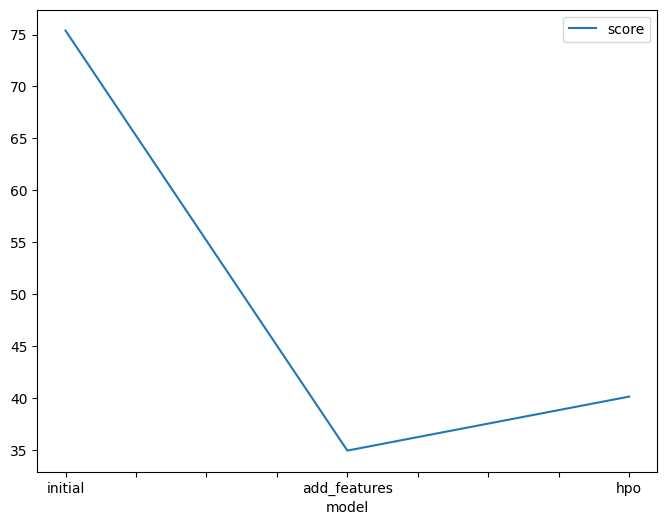

In [84]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [rmse, rmse_new_features, rmse_hpo]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

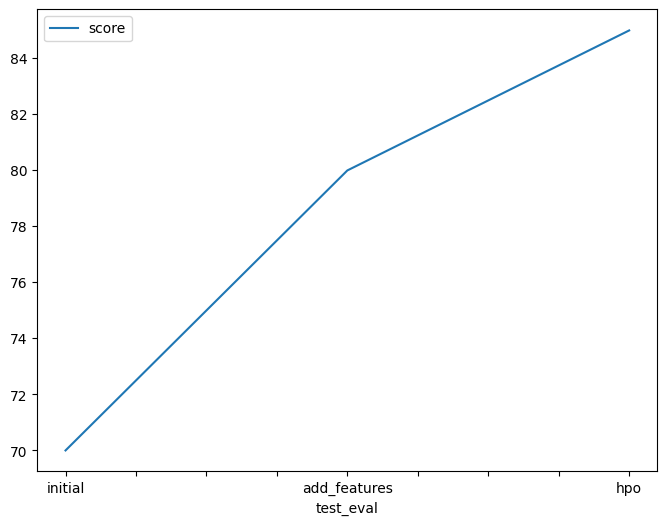

In [85]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [70, 80, 85]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')


### Hyperparameter table

In [86]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "num_trials": ["default", "25", "50"],
    "searcher": ["random", "random", "bayesopt"],
    "presets": ["best_quality", "best_quality", ""],
    "score": [75.38, 34.92, 40.12]
})


model num_trials  searcher       presets  score
0       initial    default    random  best_quality  75.38
1  add_features         25    random  best_quality  34.92
2           hpo         50  bayesopt                40.12

In [87]:
!jupyter nbconvert --to html project-template-afp-python-3.7.ipynb

[NbConvertApp] Converting notebook project-template-afp-python-3.7.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 2564523 bytes to project-template-afp-python-3.7.html
